**Load the Data to Google Colab from Github**

In [ ]:
# Clone the GitHub repository
!git clone https://github.com/HWhr3000/F21DL_Coursework_grp2.git

# Access the train and validation folders
!ls F21DL_Coursework_grp2/data/train
!ls F21DL_Coursework_grp2/data/validation

Cloning into 'F21DL_Coursework_grp2'...
remote: Enumerating objects: 34506, done.
remote: Counting objects: 100% (34506/34506), done.
remote: Compressing objects: 100% (34236/34236), done.
remote: Total 34506 (delta 265), reused 34506 (delta 265), pack-reused 0 (from 0)
Receiving objects: 100% (34506/34506), 169.57 MiB | 15.22 MiB/s, done.
Resolving deltas: 100% (265/265), done.
Updating files: 100% (35995/35995), done.
angry  disgust	fear  happy  neutral  sad  surprise
angry  disgust	fear  happy  neutral  sad  surprise


**Import the necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Define paths to the data**

In [ ]:
train_data_dir = 'F21DL_Coursework_grp2/data/train'
validation_data_dir = 'F21DL_Coursework_grp2/data/validation'

**ImageDataGenerator instances**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

**Data generators for training and validation**

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150), # Adjust target size if needed
    batch_size=32, # Adjust batch size if needed
    class_mode='categorical' # Use 'binary' if you have 2 classes
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


**Check the shape of the data**

In [ ]:
# Access the shape of the training data
for image_batch, labels_batch in train_generator:
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break  # Stop after the first batch

Image batch shape: (32, 150, 150, 3)
Labels batch shape: (32, 7)


**Count of all classes**

In [ ]:
import os
# Get class indices and names
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

# Print class names and counts
for class_name in class_names:
    class_count = len([f for f in os.listdir(os.path.join(train_data_dir, class_name)) if os.path.isfile(os.path.join(train_data_dir, class_name, f))])
    print(f"Class: {class_name}, Count: {class_count}")

Class: angry, Count: 3993
Class: disgust, Count: 436
Class: fear, Count: 4103
Class: happy, Count: 7164
Class: neutral, Count: 4982
Class: sad, Count: 4938
Class: surprise, Count: 3205


**Preview images of all classes**

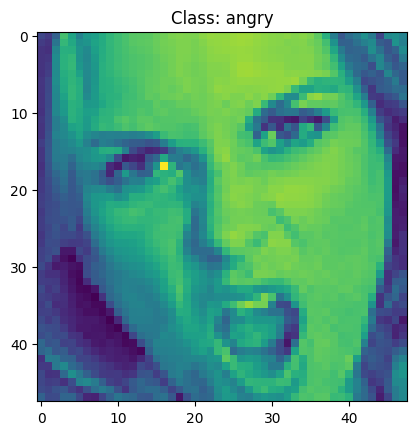

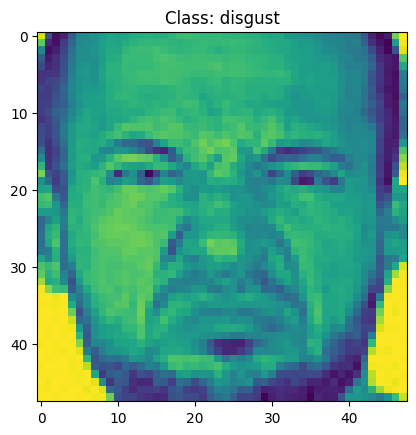

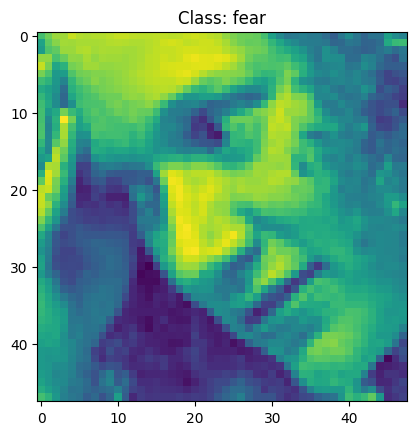

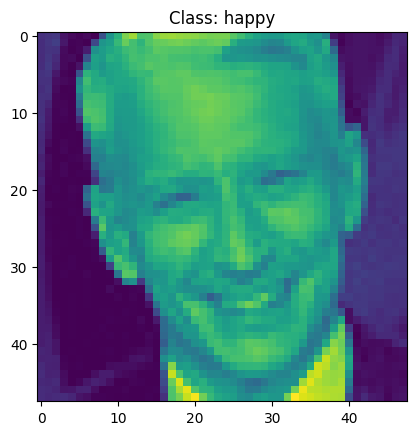

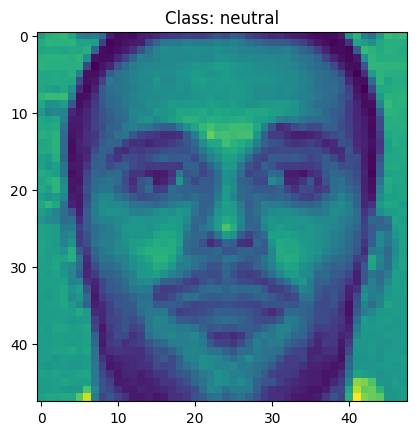

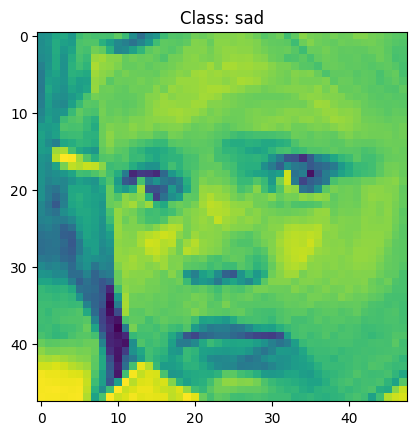

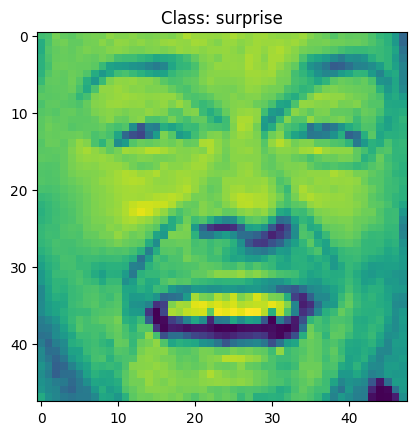

In [ ]:
import matplotlib.pyplot as plt

# Display one image from each class
for class_name in class_names:
    image_path = os.path.join(train_data_dir, class_name, os.listdir(os.path.join(train_data_dir, class_name))[0])  # Get the first image path
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f"Class: {class_name}")
    plt.show()

Remove the "Disgust since it has very few images compared to the others"

In [ ]:
import shutil

disgust_dir = os.path.join(train_data_dir, 'disgust')
shutil.rmtree(disgust_dir)

disgust_dir = os.path.join(validation_data_dir, 'disgust')
shutil.rmtree(disgust_dir)

**Recreate the data generators**

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150), # Adjust target size if needed
    batch_size=32, # Adjust batch size if needed
    class_mode='categorical' # Use 'binary' if you have 2 classes
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 28385 images belonging to 6 classes.
Found 6955 images belonging to 6 classes.


**Model Fit**

**MLP with two hidden layers**

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[150, 150, 3]), # Input shape for RGB images
    keras.layers.Dense(300, activation="relu"), # First hidden layer
    keras.layers.Dense(100, activation="relu"), # Second hidden layer
    keras.layers.Dense(6, activation="softmax") # Output layer with 6 neurons
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │      20,250,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             606 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,281,006 (77.37 MB)

 Trainable params: 20,281,006 (77.37 MB)

 Non-trainable params: 0 (0.00 B)

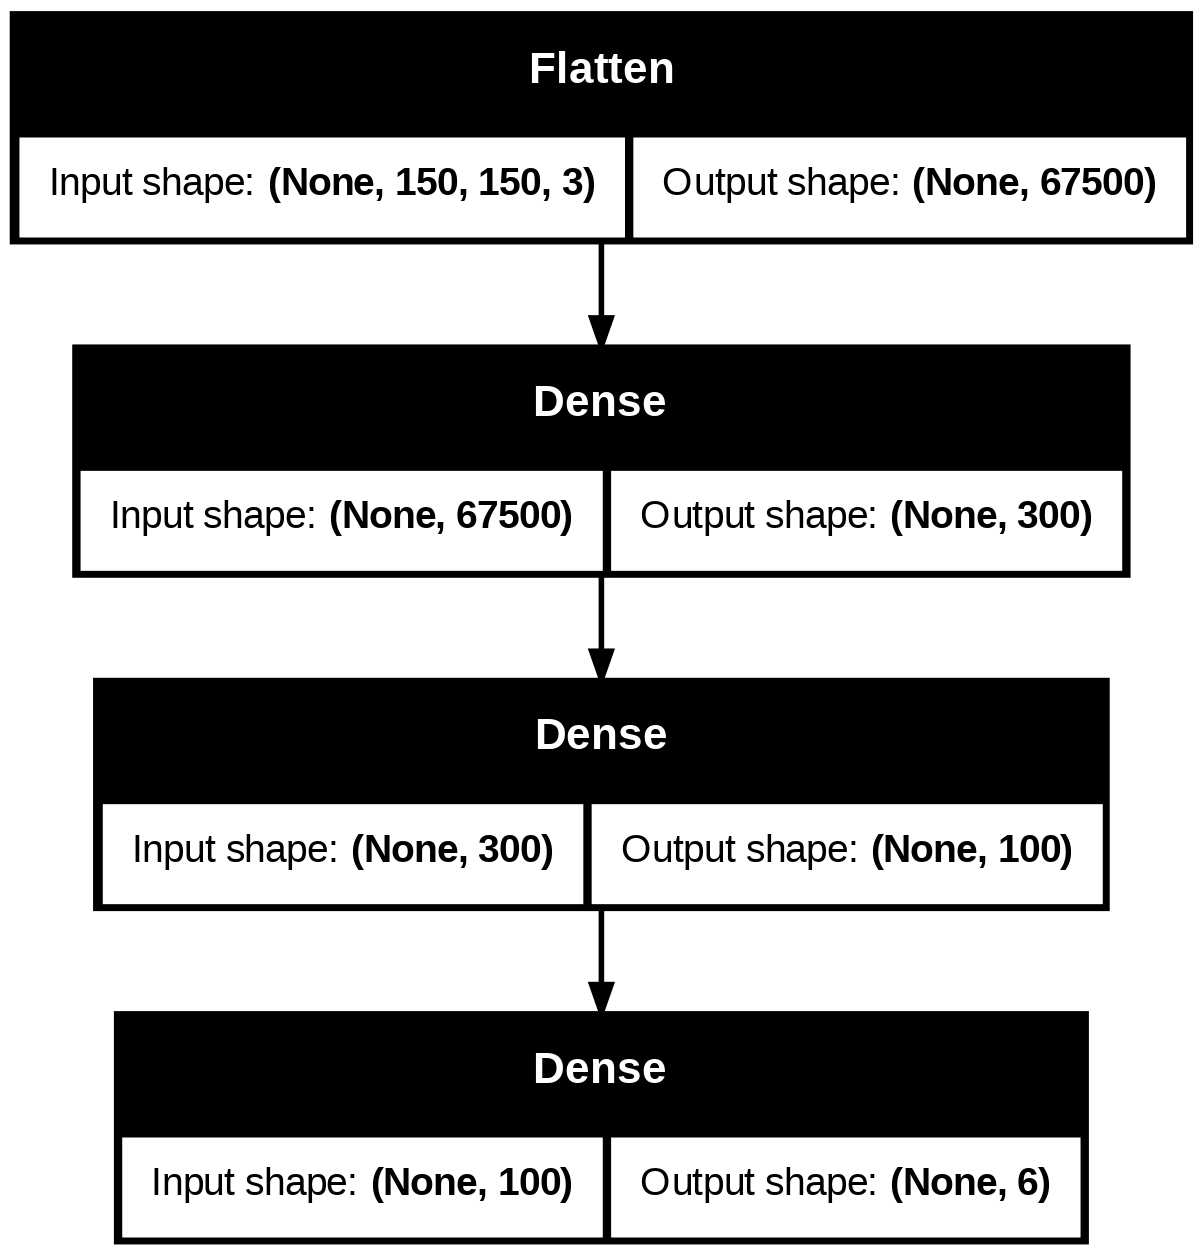

In [ ]:
keras.utils.plot_model(model, to_file='my_emotion_model.png', show_shapes=True)

**Compile the model**

In [ ]:
model.compile(loss="categorical_crossentropy", # Change the loss function
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=2000, # Adjust as needed
    epochs=30, # Adjust as needed
    validation_data=validation_generator,
    validation_steps=800 # Adjust as needed
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 888/2000 ━━━━━━━━━━━━━━━━━━━━ 6:47 366ms/step - accuracy: 0.2432 - loss: 1.9459

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 344s 171ms/step - accuracy: 0.2507 - loss: 1.8554 - val_accuracy: 0.2712 - val_loss: 1.7281
Epoch 2/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 410s 185ms/step - accuracy: 0.2849 - loss: 1.7140 - val_accuracy: 0.3216 - val_loss: 1.6609
Epoch 3/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 349s 174ms/step - accuracy: 0.3068 - loss: 1.6863 - val_accuracy: 0.3191 - val_loss: 1.6835
Epoch 4/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 325s 162ms/step - accuracy: 0.3180 - loss: 1.6702 - val_accuracy: 0.2880 - val_loss: 1.6790
Epoch 5/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 318s 158ms/step - accuracy: 0.3200 - loss: 1.6605 - val_accuracy: 0.3294 - val_loss: 1.6377
Epoch 6/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 325s 162ms/step - accuracy: 0.3236 - loss: 1.6521 - val_accuracy: 0.3676 - val_loss: 1.5910
Epoch 7/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 321s 160ms/step - accuracy: 0.3345 - loss: 1.6436 - val_accuracy: 0.3669 - val_loss: 1.5861
Epoch 8/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 331s 164ms/step - accuracy: 0.3